### TPS과 Latency에 대해서 각각 다른 scaler 사용하기

### Data Prepare (Metric)

In [256]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_BB/results/external_metrics.csv")

In [257]:
A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_BB/results/external_metrics.csv")

metrics = A_metrics.drop(['Unnamed: 0'], axis = 1)


In [258]:
# metrics = metrics.replace([np.inf],9999999)
metrics = metrics.replace([np.inf],9999999)


metrics


,tps,latency
0,2.255553,11648922.0
1,2.033328,10445860.0
2,1.977777,8698988.0
3,2.155554,10012336.0
4,2.199993,8223487.0
...,...,...
995,9019.803617,687.0
996,2.561101,7797150.0
997,8938.196096,744.0
998,2.055553,7965245.0


In [277]:
# # 'Column1'에서 inf 값을 가지는 행 추출
# inf = metrics['latency'] == np.inf

# # 결과 출력
# print(inf)
# len(inf)

metrics['latency'][68]

9999999.0

### Data Prepare (Config)

In [259]:
import random
import glob
import os
import sys
import pandas as pd

knob_list = glob.glob("/home/sein/mk_config/ycsb_BB/configs/my_*.cnf")


In [260]:
cnt = 0

for xx in range(len(knob_list)):
    path = "/home/sein/mk_config/ycsb_BB/configs/my_{}.cnf".format(xx)
    # knob_list = glob.glob("/home/sein/2023_EDBT/KCC_tpcc_dataset/my_*.cnf")
    a_all = pd.read_csv(path, sep="=", names=['Sample', 'value'], header=2)
    a_all = a_all.set_index("Sample")
    cur_all_df = a_all.T
    
    if cnt == 0:
        A_config = cur_all_df
    else :
        A_config = pd.concat([A_config, cur_all_df], axis=0)
    cnt += 1
A_config = A_config.reset_index()
A_config = A_config.drop(["index"],axis=1)
A_config = A_config.drop(A_config.columns[[0,1]], axis=1)


A_config

Sample,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,end_markers_in_json,eq_range_index_dive_limit,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,7700480,485000,352000,0,655360,356515840,7,1,1,3000,...,489472,200000,13200,4000,18,11520,255852544,28672,94208,0
1,622592,140000,701000,1,2637824,595591168,5,8,1,1300,...,374528,50000,91600,4000,17,15360,402653184,110592,71680,1
2,7110656,440000,801000,1,8093696,570425344,4,4,1,4100,...,37120,660000,15600,1,9,1024,851443712,8192,122880,0
3,8519680,760000,303000,0,10420224,343932928,3,4,1,100,...,427776,430000,11200,10000,9,13568,163577856,16384,83968,0
4,6291456,380000,630000,1,5472256,243269632,1,13,0,3800,...,388096,880000,11600,4000,25,1536,348127232,126976,57344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4276224,945000,610000,1,4096000,432013312,0,29,1,1100,...,159744,520000,91200,8000,63,7680,163577856,57344,104448,1
996,5636096,245000,211000,1,8716288,268435456,1,24,0,3900,...,455936,940000,89600,2000,29,11520,230686720,69632,61440,0
997,622592,45000,537000,1,393216,671088640,7,20,1,1200,...,308480,810000,66000,8000,48,12544,536870912,81920,108544,1
998,5505024,700000,598000,0,9125888,834666496,3,17,0,5500,...,404992,260000,70400,2000,57,3840,218103808,36864,63488,1


- all_samples = config + metrics

In [261]:
all_samples = pd.concat([A_config,metrics], axis=1)

all_samples

,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,end_markers_in_json,eq_range_index_dive_limit,...,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,7700480,485000,352000,0,655360,356515840,7,1,1,3000,...,13200,4000,18,11520,255852544,28672,94208,0,2.255553,11648922.0
1,622592,140000,701000,1,2637824,595591168,5,8,1,1300,...,91600,4000,17,15360,402653184,110592,71680,1,2.033328,10445860.0
2,7110656,440000,801000,1,8093696,570425344,4,4,1,4100,...,15600,1,9,1024,851443712,8192,122880,0,1.977777,8698988.0
3,8519680,760000,303000,0,10420224,343932928,3,4,1,100,...,11200,10000,9,13568,163577856,16384,83968,0,2.155554,10012336.0
4,6291456,380000,630000,1,5472256,243269632,1,13,0,3800,...,11600,4000,25,1536,348127232,126976,57344,0,2.199993,8223487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4276224,945000,610000,1,4096000,432013312,0,29,1,1100,...,91200,8000,63,7680,163577856,57344,104448,1,9019.803617,687.0
996,5636096,245000,211000,1,8716288,268435456,1,24,0,3900,...,89600,2000,29,11520,230686720,69632,61440,0,2.561101,7797150.0
997,622592,45000,537000,1,393216,671088640,7,20,1,1200,...,66000,8000,48,12544,536870912,81920,108544,1,8938.196096,744.0
998,5505024,700000,598000,0,9125888,834666496,3,17,0,5500,...,70400,2000,57,3840,218103808,36864,63488,1,2.055553,7965245.0


In [262]:
### boolean에 해당하는 열 정리

discrete_columns = [all_samples.columns[0], all_samples.columns[5],all_samples.columns[10],all_samples.columns[13],
                    all_samples.columns[17],all_samples.columns[24],all_samples.columns[30],all_samples.columns[31],
                    all_samples.columns[32],all_samples.columns[34],all_samples.columns[36],all_samples.columns[37],
                    all_samples.columns[58],all_samples.columns[60],all_samples.columns[64],all_samples.columns[68],
                    all_samples.columns[72],all_samples.columns[73],all_samples.columns[74],all_samples.columns[75],
                    all_samples.columns[77],all_samples.columns[80],all_samples.columns[82],all_samples.columns[83],
                    all_samples.columns[90],all_samples.columns[91],all_samples.columns[92],all_samples.columns[93],
                    all_samples.columns[118],all_samples.columns[123],all_samples.columns[124],all_samples.columns[125],
                    all_samples.columns[126]]

In [263]:
### continuous 열 정리
all_columns = all_samples.columns
continuous_columns = all_columns.drop(discrete_columns)

In [264]:
for i in range(len(discrete_columns)):
    a = discrete_columns[i]
    all_samples = all_samples.astype({a:'int'})

In [265]:
for i in range(len(continuous_columns)):
    a = continuous_columns[i]
    all_samples = all_samples.astype({a:'float'})

### config - metric prediction (with raw data)

In [266]:
# from pytorch_tabnet.tab_model import TabNetRegressor
# import numpy as np
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import MinMaxScaler,StandardScaler
# import torch
# from sklearn.metrics import r2_score
# import warnings
# warnings.filterwarnings('ignore')

# X_all = np.array(A_config)
# Y_all = np.array(metrics)

# X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)

# y_train_tps = y_train[:,0][:, np.newaxis]
# y_train_latency = y_train[:,1][:, np.newaxis]
# y_test_tps = y_test[:,0][:, np.newaxis]
# y_test_latency = y_test[:,1][:, np.newaxis]
 
# X_scaler = MinMaxScaler().fit(X_train)
# Y_scaler_tps  = MinMaxScaler().fit(y_train_tps)
# Y_scaler_latecy = MinMaxScaler().fit(y_train_latency)

# scaled_X_train = X_scaler.transform(X_train)
# scaled_X_test = X_scaler.transform(X_test)

# scaled_y_train_tps = Y_scaler_tps.transform(y_train_tps)
# scaled_y_train_latecy = Y_scaler_latecy.transform(y_train_latency)

# scaled_y_test_tps = Y_scaler_tps.transform(y_test_tps)
# scaled_y_test_latecy = Y_scaler_latecy.transform(y_test_latency)

# # scaled_y_train = np.concatenate([scaled_y_train_latecy, scaled_y_train_tps], 1)
# # scaled_y_test = np.concatenate([scaled_y_test_latecy, scaled_y_test_tps], 1)

# scaled_y_train = np.concatenate([scaled_y_train_tps, scaled_y_train_latecy], 1)
# scaled_y_test = np.concatenate([scaled_y_test_tps, scaled_y_test_latecy], 1)

In [267]:
print(metrics['tps'].min() , metrics['tps'].max())
print(metrics['latency'].min() , metrics['latency'].max())


0.0 9995.023461511915
578.0 14499570.0


In [241]:
# y_train_tps
# metrics.shape
scaled_y_test.shape

(200, 2)

In [269]:
### TabNet
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import torch
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

X_all = np.array(A_config)
Y_all = np.array(metrics)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)

y_train_tps = y_train[:,0][:, np.newaxis]
y_train_latency = y_train[:,1][:, np.newaxis]
y_test_tps = y_test[:,0][:, np.newaxis]
y_test_latency = y_test[:,1][:, np.newaxis]
 
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler_tps  = MinMaxScaler().fit(y_train_tps)
Y_scaler_latecy = MinMaxScaler().fit(y_train_latency)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)

scaled_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_y_train_latecy = Y_scaler_latecy.transform(y_train_latency)

scaled_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_y_test_latecy = Y_scaler_latecy.transform(y_test_latency)

# scaled_y_train = np.concatenate([scaled_y_train_latecy, scaled_y_train_tps], 1)
# scaled_y_test = np.concatenate([scaled_y_test_latecy, scaled_y_test_tps], 1)

scaled_y_train = np.concatenate([scaled_y_train_tps, scaled_y_train_latecy], 1)
scaled_y_test = np.concatenate([scaled_y_test_tps, scaled_y_test_latecy], 1)

# Tabnet 모델 생성
regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) ### Basic

# 모델 학습
regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train,
              eval_set=[(scaled_X_test, scaled_y_test)],
              patience=100, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])


predictions = regressor.predict(scaled_X_test)

test_score = mean_squared_error(y_pred = predictions, y_true = scaled_y_test)
# 성능 평가
print('BEST VALID SCORE : ', regressor.best_cost)
# print('MSE_SCORE : ', test_score)
# print('R2 SCORE : ' , r2_score(predictions, scaled_y_test, multioutput='variance_weighted'))
# print('R2 SCORE : ' , r2_score(predictions, scaled_y_test))
print('R2 SCORE : ' , r2_score(scaled_y_test, predictions))




epoch 0  | loss: 1.76762 | val_0_mse: 0.25228 |  0:00:00s
epoch 10 | loss: 0.07482 | val_0_mse: 0.08727 |  0:00:01s
epoch 20 | loss: 0.07106 | val_0_mse: 0.08203 |  0:00:02s
epoch 30 | loss: 0.06241 | val_0_mse: 0.08564 |  0:00:03s
epoch 40 | loss: 0.05749 | val_0_mse: 0.08682 |  0:00:04s
epoch 50 | loss: 0.04409 | val_0_mse: 0.10029 |  0:00:05s
epoch 60 | loss: 0.03334 | val_0_mse: 0.11775 |  0:00:06s
epoch 70 | loss: 0.0258  | val_0_mse: 0.13315 |  0:00:07s
epoch 80 | loss: 0.02242 | val_0_mse: 0.11994 |  0:00:08s
epoch 90 | loss: 0.02053 | val_0_mse: 0.12524 |  0:00:09s
epoch 100| loss: 0.01578 | val_0_mse: 0.12309 |  0:00:10s
epoch 110| loss: 0.01926 | val_0_mse: 0.13446 |  0:00:11s
epoch 120| loss: 0.01602 | val_0_mse: 0.11882 |  0:00:12s

Early stopping occurred at epoch 120 with best_epoch = 20 and best_val_0_mse = 0.08203
BEST VALID SCORE :  0.08203484170346054
R2 SCORE :  -0.010649627689377272


In [224]:
type(scaled_y_test)

numpy.ndarray

In [270]:
print(scaled_y_test)
print("=======================")
print(predictions)


[[ 2.14011012e-04  5.75400759e-01]
 [ 1.76768397e-04  6.81273015e-01]
 [ 2.31799831e-04  4.37922305e-01]
 [ 9.55892791e-01  4.13821871e-06]
 [ 9.39290506e-01  4.13821871e-07]
 [ 3.41862300e-04  3.91178228e-01]
 [ 8.17138485e-05  6.23086143e-01]
 [ 8.11580187e-05  5.09368513e-01]
 [ 8.53455484e-01  3.10366403e-06]
 [ 3.66874755e-05  7.04271097e-01]
 [ 8.83837717e-05  7.67633709e-01]
 [ 6.89283248e-05  6.61746555e-01]
 [ 9.13938181e-01  3.44851559e-06]
 [ 1.11174286e-04  6.06392500e-01]
 [ 9.75907322e-01  1.72425780e-06]
 [ 2.75713539e-04  3.77938549e-01]
 [ 7.74976267e-01  4.55204058e-06]
 [ 1.75656714e-04  3.70010067e-01]
 [ 2.39581021e-04  5.23383764e-01]
 [ 1.27851358e-04  7.53430514e-01]
 [ 6.22576516e-05  5.62012449e-01]
 [ 1.76768236e-04  5.86767894e-01]
 [ 1.32853690e-04  6.97741471e-01]
 [ 1.81215029e-04  5.74659052e-01]
 [ 9.67283964e-01  2.55190154e-06]
 [ 3.21851952e-04  3.71545760e-01]
 [ 9.76639275e-01  2.00013904e-06]
 [ 8.33811361e-05  7.85131132e-01]
 [ 9.98179955e-01  2

In [198]:
from sklearn.metrics import r2_score

#TPS , Latency

for i in range(2):  
    r2_score_column = r2_score(predictions[:, i], scaled_y_test[:, i])
    print(f'Column {i} R2 Score: {r2_score_column}')
    

Column 0 R2 Score: -119.05376838396882
Column 1 R2 Score: -4407.26205626146


### LHS SAMPLING

In [109]:
import pandas as pd

knob_info = pd.read_csv('Knob_Information_MySQL_v5.7.csv')

knob_min = knob_info['raw_min']
knob_max = knob_info['raw_max']


In [110]:
knob_info

,name,type,unit,s_unit,raw_min,d_f_min,raw_max,d_f_max,raw_default,d_f_default,q_factor
0,automatic_sp_privileges,boolean,1,NaN,0,0,1.000000e+00,1,0.0,0.0,1
1,back_log,integer,1,NaN,1,0,6.000000e+04,60,4030.0,4.0,1000
2,binlog_cache_size,integer,1024,KB,4096,0,1.048576e+07,640,32768.0,2.0,16384
3,binlog_group_commit_sync_delay,integer,1,microsecond,0,0,1.000000e+06,200,0.0,0.0,5000
4,binlog_group_commit_sync_no_delay_count,integer,1,NaN,0,0,1.000000e+06,1000,0.0,0.0,1000
...,...,...,...,...,...,...,...,...,...,...,...
133,thread_cache_size,integer,1,NaN,0,0,1.638400e+04,64,-1.0,1.0,256
134,tmp_table_size,integer,1048576,MB,1024,0,1.073742e+09,256,16777216.0,4.0,4194304
135,transaction_alloc_block_size,integer,1024,KB,1024,0,1.310720e+05,32,8192.0,2.0,4096
136,transaction_prealloc_size,integer,1024,KB,1024,0,1.310720e+05,64,4096.0,2.0,2048


In [111]:
from pyDOE import *
from scipy.stats.distributions import uniform

def LH_Sampling(KNOB, KNOB_DETAILS, sample_num):
    maxvals = []
    minvals = []
    types = []
    names = []
    nfeats = len(KNOB)
    
    for knob in range (len(KNOB)):
        names.append(knob)
        knob_info = KNOB_DETAILS
        
        
        if knob_info['type'][knob] == 'boolean':
            maxvals.append(int(1))
            minvals.append(int(0))
        else:
            maxvals.append((knob_info['raw_max'][knob]).astype(int))
            minvals.append((knob_info['raw_min'][knob]).astype(int))
        types.append(knob_info['type'])
        

    samples = lhs(nfeats, samples=sample_num, criterion='maximin')
    
    maxvals = np.array(maxvals)
    minvals = np.array(minvals)
    scales = maxvals - minvals
    
    for fidx in range(nfeats):
        samples[:, fidx] = uniform(loc=minvals[fidx], scale=scales[fidx]).ppf(samples[:, fidx])
        
    lhs_samples = []
    for sidx in range(sample_num):
        lhs_samples.append(dict())
        for fidx in range(nfeats):
            # lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            # lhs_samples[-1][names[fidx]] = int(round(samples[fidx][sidx]))
            
    random.shuffle(lhs_samples)

    return lhs_samples

A_config_columns = A_config.columns.to_list()
A_config_columns_stripped = [column.strip() for column in A_config_columns]
mm_sample = LH_Sampling(A_config_columns_stripped, knob_info, 4000)


In [122]:
len(mm_sample)

4000

In [112]:
sample_list = []
for ll in mm_sample:
    val = list(ll.values())
    sample_list.append(val)
# sample_list = [ll]

In [113]:
samples = sample_list
samples = np.array(samples)

In [114]:
samples.shape

(4000, 138)

In [115]:
### LHS sampling으로 생성한 X값에 대한 scaling

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

new_X = np.array(samples)
# new_X = np.round(new_X)
Z_scaler = MinMaxScaler().fit(new_X)
new_X_ = Z_scaler.transform(new_X)
# print(new_X_)

predictions_new = regressor.predict(new_X_) #scaling O


In [243]:
predictions_new.max()

0.9440331

### 수정한 부분 = inverse_new_ ~ 

In [116]:
### new_metrics_re = 원래 metric + predic_metric
### predictions_new == predict_model.predict(new_sample)

predictions_new_df = pd.DataFrame(predictions_new) #새로운 데이터에 대한 metric값


# inverse를 통해서 원래 데이터 형태로
inverse_new_pred_tps = Y_scaler_tps.inverse_transform(predictions_new[:, 0].reshape(-1, 1))
inverse_new_pred_lat = Y_scaler_latecy.inverse_transform(predictions_new[:, 1].reshape(-1, 1))

inverse_new_pred_sum = np.concatenate([inverse_new_pred_tps, inverse_new_pred_lat], axis=1)
inverse_new_pred_pd = pd.DataFrame(inverse_new_pred_sum)
inverse_new_pred_pd.rename(columns={0: "tps", 1:"latency"}, inplace=True)
# inverse_new_pred_pd

new_metrics_re = pd.concat([metrics,inverse_new_pred_pd], axis=0)
# new_metrics_re = new_metrics_re.drop(['index'], axis=1)

new_metrics_re = new_metrics_re.reset_index()



In [117]:
# new_metrics_re = new_metrics_re.drop(['index'], axis=1)

inverse_new_pred_pd


,tps,latency
0,-87.091873,2705136.000
1,93.224037,2375059.500
2,105.987862,2358487.000
3,60.927345,2479620.250
4,5385.217285,1483167.625
...,...,...
3995,-4.203012,2441344.750
3996,43.137962,2340177.500
3997,116.912094,4177367.500
3998,91.180038,4449509.500


In [118]:
new_metrics_re = new_metrics_re.drop(['index'], axis=1)
new_metrics_re

,tps,latency
0,9999.977871,580.00
1,6.483304,2234180.00
2,6.816645,2588946.00
3,4.727776,3911618.00
4,8.116657,2234125.00
...,...,...
4995,-4.203012,2441344.75
4996,43.137962,2340177.50
4997,116.912094,4177367.50
4998,91.180038,4449509.50


### 인자 정리
- new_X = samples = LHS Sampling으로 생성한 데이터
<!-- - new_metrics = 생성한 데이터에 대해서 TabNET이 예측한 metrics + 원래 metrics (scaling X) -->
- new_metrics_re = 원래 metric (A_metrics) + 생성한 데이터로 예측한 metric (scaling X)
- new_Samples = 원래 config + 생성한 config (scaling X)
- newnewnew = AutoEncoder에 넣을 수 있는 데이터셋

In [119]:
new_X_pd = pd.DataFrame(new_X)
# new_X_pd = round(new_X_pd).astype(int)
for i in range(len(new_X_pd.columns)):
    new_X_pd.rename(columns={new_X_pd.columns[i]: A_config.columns[i]}, inplace=True)   
    
new_Samples = pd.concat([A_config,new_X_pd] , axis=0)

In [120]:
# pd.options.display.max_rows = 60
# pd.options.display.max_columns = 20

# new_Samples = new_Samples.reset_index()
new_Samples = new_Samples.drop(['index'], axis=1)
# new_Samples = new_Samples.round()

In [121]:
new_Samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,11000,1818624,880000,444000,0,1851392,180355072,1,15,...,304384,850000,58800,4000,53,12800,352321536,53248,6144,0
1,0,31000,1097728,455000,80000,1,7929856,880803840,7,1,...,449792,480000,90800,2000,26,16384,192937984,86016,94208,0
2,0,57000,9863168,740000,860000,1,7258112,750780416,1,5,...,170496,790000,23600,4000,14,9472,629145600,118784,73728,1
3,0,44000,5832704,810000,313000,0,737280,964689920,6,4,...,76800,160000,58000,6000,5,2816,763363328,61440,2048,0
4,0,45000,3948544,575000,678000,0,8929280,943718400,4,12,...,149760,80000,69600,4000,57,3584,910163968,57344,14336,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,54876,8807357,568988,53262,1,5250526,580570971,3,1,...,452889,842504,72870,8657,63,16285,871971197,96745,41967,1
4996,1,36887,9730051,168220,456472,1,3228338,626668201,7,7,...,39477,557795,60439,5422,25,14977,815381519,54792,90922,0
4997,0,49989,9580622,756328,119022,0,3755975,386314101,5,9,...,284674,535705,63488,8845,38,2689,534323260,129692,129652,0
4998,1,40599,1506152,993846,255676,1,7613642,307953134,2,3,...,422060,804003,82901,6081,20,11589,275623023,10864,117300,1


In [185]:
new_Samples.shape


(5000, 138)

In [123]:
# new_metrics_re = new_metrics_re.drop(['index'], axis=1)

new_metrics_re


,tps,latency
0,9999.977871,580.00
1,6.483304,2234180.00
2,6.816645,2588946.00
3,4.727776,3911618.00
4,8.116657,2234125.00
...,...,...
4995,-4.203012,2441344.75
4996,43.137962,2340177.50
4997,116.912094,4177367.50
4998,91.180038,4449509.50


### NEW_IDEA
### AE Train set에 추가 (1000 + 10000) AUG == new_Samples

In [124]:
newnewwnew = pd.concat([new_Samples, new_metrics_re], axis = 1)

In [125]:
newnewwnew

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,1,11000,1818624,880000,444000,0,1851392,180355072,1,15,...,58800,4000,53,12800,352321536,53248,6144,0,9999.977871,580.00
1,0,31000,1097728,455000,80000,1,7929856,880803840,7,1,...,90800,2000,26,16384,192937984,86016,94208,0,6.483304,2234180.00
2,0,57000,9863168,740000,860000,1,7258112,750780416,1,5,...,23600,4000,14,9472,629145600,118784,73728,1,6.816645,2588946.00
3,0,44000,5832704,810000,313000,0,737280,964689920,6,4,...,58000,6000,5,2816,763363328,61440,2048,0,4.727776,3911618.00
4,0,45000,3948544,575000,678000,0,8929280,943718400,4,12,...,69600,4000,57,3584,910163968,57344,14336,1,8.116657,2234125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,54876,8807357,568988,53262,1,5250526,580570971,3,1,...,72870,8657,63,16285,871971197,96745,41967,1,-4.203012,2441344.75
4996,1,36887,9730051,168220,456472,1,3228338,626668201,7,7,...,60439,5422,25,14977,815381519,54792,90922,0,43.137962,2340177.50
4997,0,49989,9580622,756328,119022,0,3755975,386314101,5,9,...,63488,8845,38,2689,534323260,129692,129652,0,116.912094,4177367.50
4998,1,40599,1506152,993846,255676,1,7613642,307953134,2,3,...,82901,6081,20,11589,275623023,10864,117300,1,91.180038,4449509.50


In [126]:
new_Samples.values.shape

(5000, 138)

### 원래 sample + 생성한 sample에 대해 AE가 되는지 확인
- Config와 Metric 따로 스케일링!!

In [127]:

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader

scaler = MinMaxScaler()
scaled_samples = scaler.fit_transform(new_Samples)
# tps , latency 따로 scaling
scaled_new_metrics_re_tps = scaler.fit_transform(new_metrics_re['tps'].values.reshape(-1, 1))
scaled_new_metrics_re_lat = scaler.fit_transform(new_metrics_re['latency'].values.reshape(-1, 1))

scaled_new_Samples = np.concatenate([scaled_samples,scaled_new_metrics_re_tps,scaled_new_metrics_re_lat], axis = 1)

# tps , Latency 따로 sclaling하고 합친거
X_train, X_test = train_test_split(scaled_new_Samples, test_size=0.2, shuffle=True)

dataset_tr = TensorDataset(torch.tensor(X_train))
dataset_te = TensorDataset(torch.tensor(X_test))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=128, shuffle=True)


In [128]:
### 원본

import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(140,128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(
        nn.Linear(32,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128, 140), 
        nn.Sigmoid()
    )
  
  #인코더와 디코더 연산을 차례대로 수행하도록 설정 
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [129]:
# from torch import device
from torch import optim
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model =Autoencoder().to(device)
model = Autoencoder().to(device)
# model = Autoencoder()


critertion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
#lr=1e-4
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trainloss = []
validationloss = []
epoch_list = []

for epoch in range(10000):
  running_loss = 0
  model.train()
  
  for data in trainloader:
    inputs = data[0].float().to(device)
    optimizer.zero_grad()
    outputs = model(inputs) 
    loss = critertion(inputs, outputs)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  trainloss.append(train_loss)
  # epoch_list.append(epoch)
  
  if epoch % 300 == 0:
    total_val_loss = 0
    model.eval()
    with torch.no_grad():
      running_loss = 0
      
      for data in testloader:
        inputs = data[0].float().to(device)
        # optimizer.zero_grad()
        outputs = model(inputs) 
        loss = critertion(inputs, outputs)
        running_loss += loss.item()
        inputs_np = inputs.cpu().detach().numpy()
        outputs_np = outputs.cpu().detach().numpy()
      total_val_loss = running_loss / len(testloader)
      validationloss.append(total_val_loss)
        
    print('[%d] tr_loss : %.3f | val_loss : %.3f' %(epoch +1, train_loss, total_val_loss))
    # print('MSE_Loss :', critertion(inputs, outputs) )

[1] tr_loss : 0.126 | val_loss : 0.125
[301] tr_loss : 0.087 | val_loss : 0.091
[601] tr_loss : 0.077 | val_loss : 0.078
[901] tr_loss : 0.070 | val_loss : 0.069
[1201] tr_loss : 0.068 | val_loss : 0.067
[1501] tr_loss : 0.065 | val_loss : 0.064
[1801] tr_loss : 0.064 | val_loss : 0.063
[2101] tr_loss : 0.063 | val_loss : 0.063
[2401] tr_loss : 0.062 | val_loss : 0.062
[2701] tr_loss : 0.061 | val_loss : 0.061
[3001] tr_loss : 0.060 | val_loss : 0.060
[3301] tr_loss : 0.060 | val_loss : 0.060
[3601] tr_loss : 0.060 | val_loss : 0.060
[3901] tr_loss : 0.059 | val_loss : 0.059
[4201] tr_loss : 0.059 | val_loss : 0.058
[4501] tr_loss : 0.058 | val_loss : 0.058
[4801] tr_loss : 0.058 | val_loss : 0.058
[5101] tr_loss : 0.057 | val_loss : 0.057
[5401] tr_loss : 0.057 | val_loss : 0.057
[5701] tr_loss : 0.057 | val_loss : 0.058
[6001] tr_loss : 0.057 | val_loss : 0.058
[6301] tr_loss : 0.056 | val_loss : 0.058
[6601] tr_loss : 0.056 | val_loss : 0.057
[6901] tr_loss : 0.056 | val_loss : 0.05

### AutoEncoder T-SNE

In [198]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler,StandardScaler


n_components = 2

scaler = MinMaxScaler()
input_array = scaler.fit_transform(inputs_np)


tsne_model = TSNE(n_components=n_components)

r = tsne_model.fit_transform(input_array)

# print(tsne_model.fit_transform(input_array))

In [199]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.datasets import load_digit
import torch


n_components = 2

tsne_model = TSNE(n_components=n_components)

# r2 = tsne_model.fit_transform(torch.tensor(synthetic_data).cpu())
scaler = MinMaxScaler()
output_array = scaler.fit_transform(outputs_np)
r2 = tsne_model.fit_transform(output_array)

 
# print(tsne_model.fit_transform(input_array))

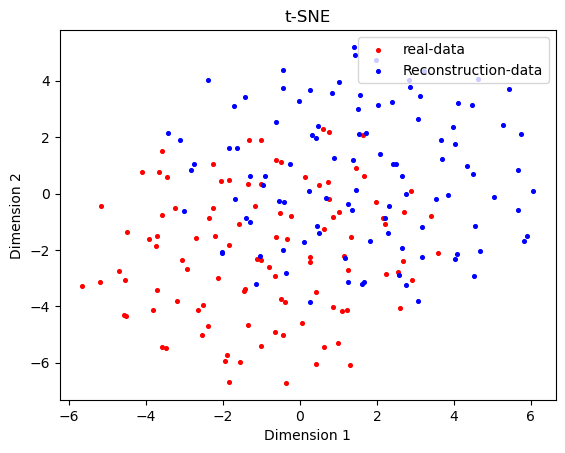

<Figure size 1000x1000 with 0 Axes>

In [200]:
import matplotlib.pyplot as plt

# t-SNE 결과 시각화
plt.scatter(r[:, 0], r[:, 1], s=7, color='red',  label='real-data')
plt.scatter(r2[:, 0], r2[:, 1], s=7, color='blue', label='Reconstruction-data')

plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


plt.legend(loc='upper right')
plt.figure(figsize=(10,10))
plt.show()


### Optimization in latent space (TabNet)
- Prediction

In [130]:
### 원래 데이터 + LHS Sampling data 차원을 32로 줄인 latent space 구하기
### X = latent config (# 1500) , Y = metrics (# 2)

import torch
import pandas as pd
import numpy as np

ex_scaled_new_Samples = torch.Tensor(scaled_new_Samples).to(device)

with torch.no_grad():
    encoded_vector_BO = model.encoder(ex_scaled_new_Samples)
    print("BO'S Encoded Latent Vector:", encoded_vector_BO)

BO'S Encoded Latent Vector: tensor([[0.2717, 0.4776, 0.5323,  ..., 0.3781, 0.3967, 0.5074],
        [0.5661, 0.5064, 0.4217,  ..., 0.6841, 0.4933, 1.0000],
        [0.5633, 0.5199, 0.3923,  ..., 0.4425, 0.4747, 0.5448],
        ...,
        [0.5197, 0.3676, 0.4421,  ..., 0.5096, 0.6023, 0.8141],
        [0.5528, 0.5208, 0.4020,  ..., 0.3924, 0.4977, 1.0000],
        [0.6001, 0.5182, 0.4106,  ..., 0.2988, 0.7842, 0.8784]],
       device='cuda:0')


In [131]:
### TabNet
### X = encoded_vector_BO (Scaling O) , Y = metrics (Scaling X)

from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_latent = np.array(encoded_vector_BO.cpu().numpy())
Y_latent = np.array(new_metrics_re)

lt_X_train, lt_X_test, lt_y_train, lt_y_test = train_test_split(X_latent,Y_latent,test_size=0.2, shuffle=True)


y_train_tps = lt_y_train[:,0][:, np.newaxis]
y_train_latecy = lt_y_train[:,1][:, np.newaxis]
y_test_tps = lt_y_test[:,0][:, np.newaxis]
y_test_latecy = lt_y_test[:,1][:, np.newaxis]


Y_scaler_tps  = MinMaxScaler().fit(y_train_tps)
Y_scaler_latecy = MinMaxScaler().fit(y_train_latecy)


scaled_lt_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_lt_y_train_latency = Y_scaler_latecy.transform(y_train_latecy)


scaled_lt_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_lt_y_test_latency = Y_scaler_latecy.transform(y_test_latecy)


scaled_lt_y_train = np.concatenate([scaled_lt_y_train_tps, scaled_lt_y_train_latency], axis = 1)
scaled_lt_y_test = np.concatenate([scaled_lt_y_test_tps, scaled_lt_y_test_latency], axis = 1)

# Tabnet 모델 생성
lt_regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) 
    
# 모델 학습
lt_regressor.fit(X_train=lt_X_train, y_train=scaled_lt_y_train,
              eval_set=[(lt_X_test, scaled_lt_y_test)],
              patience=500, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])

# 테스트 데이터로 예측
lt_predictions = lt_regressor.predict(lt_X_test)

# 성능 평가
print('BEST VALID SCORE : ', lt_regressor.best_cost)
# print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions, multioutput='variance_weighted'))
print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions))



# print('MSE_SCORE : ', test_score)



epoch 0  | loss: 0.15707 | val_0_mse: 0.04938 |  0:00:00s
epoch 10 | loss: 0.04202 | val_0_mse: 0.04425 |  0:00:06s
epoch 20 | loss: 0.03438 | val_0_mse: 0.03685 |  0:00:11s
epoch 30 | loss: 0.01974 | val_0_mse: 0.02122 |  0:00:17s
epoch 40 | loss: 0.0166  | val_0_mse: 0.0181  |  0:00:23s
epoch 50 | loss: 0.01576 | val_0_mse: 0.01902 |  0:00:29s
epoch 60 | loss: 0.01495 | val_0_mse: 0.01936 |  0:00:34s
epoch 70 | loss: 0.01516 | val_0_mse: 0.01804 |  0:00:40s
epoch 80 | loss: 0.01432 | val_0_mse: 0.01651 |  0:00:45s
epoch 90 | loss: 0.0143  | val_0_mse: 0.01705 |  0:00:51s
epoch 100| loss: 0.01391 | val_0_mse: 0.01668 |  0:00:56s
epoch 110| loss: 0.01279 | val_0_mse: 0.02031 |  0:01:02s
epoch 120| loss: 0.01312 | val_0_mse: 0.01934 |  0:01:08s
epoch 130| loss: 0.01217 | val_0_mse: 0.02029 |  0:01:13s
epoch 140| loss: 0.01146 | val_0_mse: 0.02166 |  0:01:19s
epoch 150| loss: 0.00922 | val_0_mse: 0.02258 |  0:01:24s
epoch 160| loss: 0.01017 | val_0_mse: 0.01859 |  0:01:30s
epoch 170| los

In [120]:
for i in range(2):  
    r2_score_column = r2_score(lt_predictions[:, i], scaled_lt_y_test[:, i])
    print(f'Column {i} R2 Score: {r2_score_column}')
    

Column 0 R2 Score: 0.8997747735439494
Column 1 R2 Score: 0.15425465079086464


In [132]:
latent_pd = pd.DataFrame(encoded_vector_BO.cpu().numpy())
latent_pd_T = latent_pd.T
latent_pd_T.index
# latent_pd_T

RangeIndex(start=0, stop=32, step=1)

In [133]:
### BO 코드
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics, config_info_path=None):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        self.config_info_path = config_info_path
        # self.min_max_same_knobs = []
        
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        if self.config_info_path is None:
            self.config_info = pd.read_csv('/home/sein/mk_config/Knob_Information_MySQL_v5.7.csv', index_col=0)
        else:
            self.config_info = pd.read_csv(self.config_info_path, index_col=0)
        
        # if self.top_z_knob is not None:
        #     self.config_info = self.config_info.loc[self.top_z_knob]
        #     self.configs = self.configs[self.top_z_knob]
            

#     def _get_history(self):
#         self.history_configs = self.smac.runhistory.get_configs()
    
    def _init_pbounds(self):
        self.pbounds = {}
        
        for v in latent_pd_T.index:
            self.pbounds[str(v)] = (0, 1)
            
    
    def train_regression_model(self):
        X_all = np.array(self.configs)
        Y_all = np.array(self.metrics)
        
        cnt = 0
        while(True):
            bo_lt_X_train, bo_lt_X_test, bo_lt_y_train, bo_lt_y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)


            bo_y_train_tps = bo_lt_y_train[:,0][:, np.newaxis]
            bo_y_train_latecy = bo_lt_y_train[:,1][:, np.newaxis]
            bo_y_test_tps = bo_lt_y_test[:,0][:, np.newaxis]
            bo_y_test_latecy = bo_lt_y_test[:,1][:, np.newaxis]


            bo_Y_scaler_tps  = MinMaxScaler().fit(bo_y_train_tps)
            bo_Y_scaler_latecy = MinMaxScaler().fit(bo_y_train_latecy)


            bo_scaled_lt_y_train_tps = bo_Y_scaler_tps.transform(bo_y_train_tps)
            bo_scaled_lt_y_train_latency = bo_Y_scaler_latecy.transform(bo_y_train_latecy)


            bo_scaled_lt_y_test_tps = bo_Y_scaler_tps.transform(bo_y_test_tps)
            bo_scaled_lt_y_test_latency = bo_Y_scaler_latecy.transform(bo_y_test_latecy)


            bo_scaled_lt_y_train = np.concatenate([bo_scaled_lt_y_train_tps, bo_scaled_lt_y_train_latency], axis = 1)
            bo_scaled_lt_y_test = np.concatenate([bo_scaled_lt_y_test_tps, bo_scaled_lt_y_test_latency], axis = 1)

            # Tabnet 모델 생성
            bo_lt_regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) 
                
            # 모델 학습
            bo_lt_regressor.fit(X_train=bo_lt_X_train, y_train=bo_scaled_lt_y_train,
                        eval_set=[(bo_lt_X_test, bo_scaled_lt_y_test)],
                        patience=200, 
                        batch_size = 128,
                        max_epochs=10000,
                        eval_metric=['mse'])

            # 테스트 데이터로 예측
            bo_lt_predictions = bo_lt_regressor.predict(bo_lt_X_test)

            accuracy = r2_score(bo_scaled_lt_y_test, bo_lt_predictions)
            cnt += 1
            
            print(cnt, accuracy)
            # print(r2_score_)
            if accuracy > 0.80 or cnt > 15:
            # if accuracy > 0.80 or cnt > 10:
                break


        self.model = bo_lt_regressor
    
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        # scaled_X = self.X_scaler.transform([x])
        x = x.reshape(1, -1)

        res = self.model.predict(x)
        res = res[:,0] / res[:,1]

        
        return res.squeeze()
        # return res
    
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2)

        self.acquisition_function = UtilityFunction(kind="ucb", kappa=2.5, xi=0.0)
        
        self.optimizer.maximize(n_iter=self.iteration, acquisition_function=self.acquisition_function)
    
    
    def plot_history(self):
        self.y_obs = - np.array([res["target"] for res in self.optimizer.res])
        
        self.his_inc = []
        inc = np.inf
        ## Get minimum results on each iteration
        for res in self.y_obs:
            if res < inc:
                inc = res
            self.his_inc.append(inc)
#             res.append(his_res)

        plt.plot(self.his_inc)
        plt.xlabel('Iteration')
        plt.ylabel('result')
        plt.show()

### 밑에 다 돌린거고 decoding해서 값 확인해보기

In [134]:
tuner1 = BO(iteration=500, 
           configs=encoded_vector_BO.cpu().numpy(),
           metrics=new_metrics_re
           )
tuner1.train_regression_model()
tuner1.tune()
# tuner1.plot_history()

epoch 0  | loss: 0.14592 | val_0_mse: 0.05357 |  0:00:00s
epoch 10 | loss: 0.04288 | val_0_mse: 0.04335 |  0:00:06s
epoch 20 | loss: 0.04223 | val_0_mse: 0.0438  |  0:00:11s
epoch 30 | loss: 0.02701 | val_0_mse: 0.02783 |  0:00:17s
epoch 40 | loss: 0.01517 | val_0_mse: 0.01725 |  0:00:22s
epoch 50 | loss: 0.01463 | val_0_mse: 0.01757 |  0:00:28s
epoch 60 | loss: 0.0149  | val_0_mse: 0.01744 |  0:00:33s
epoch 70 | loss: 0.0144  | val_0_mse: 0.01745 |  0:00:39s
epoch 80 | loss: 0.01318 | val_0_mse: 0.01594 |  0:00:44s
epoch 90 | loss: 0.01303 | val_0_mse: 0.0157  |  0:00:50s
epoch 100| loss: 0.01347 | val_0_mse: 0.0169  |  0:00:55s
epoch 110| loss: 0.01369 | val_0_mse: 0.01571 |  0:01:01s
epoch 120| loss: 0.01338 | val_0_mse: 0.01598 |  0:01:06s
epoch 130| loss: 0.01366 | val_0_mse: 0.01838 |  0:01:12s
epoch 140| loss: 0.01229 | val_0_mse: 0.01727 |  0:01:17s
epoch 150| loss: 0.01329 | val_0_mse: 0.02385 |  0:01:23s
epoch 160| loss: 0.01211 | val_0_mse: 0.01983 |  0:01:29s
epoch 170| los

In [129]:
ex_data = [0.3546, 0.9711, 0.9019, 0.2642, 0.2349, 0.4112, 0.1512, 0.1086, 0.1675, 0.4652,
           0.376, 0.9042, 0.6211, 0.1626, 0.07484, 0.6172, 0.552, 0.9333, 0.304, 0.9188,
           0.693, 0.6077, 0.7896, 0.04812, 0.7077, 0.9259, 0.9158, 0.8643, 0.8661, 0.6548,
           0.02615, 0.4607    ]

In [499]:
ex_data = [0.9618, 0.3722, 0.7729, 0.4546, 0.8661, 0.06776, 0.9388, 0.2249, 0.07023, 0.8804, 0.4176,
           0.4351, 0.5852, 0.725, 0.3785, 0.5668, 0.7144, 0.995, 0.3073, 0.3751, 0.2147, 0.7408, 0.5485,
           0.2331, 0.2247, 0.9888, 0.9828, 0.3256, 0.2536, 0.01244, 0.64, 0.9643]

In [509]:
### 301
ex_data = [0.4931, 0.7291, 0.4505, 0.3691, 0.6367, 0.6561, 0.3723, 0.4976, 0.107, 0.4179, 0.4955, 0.2148,
           0.5197, 0.6373, 0.8811, 0.3118, 0.1337, 0.7465, 0.419, 0.8468, 0.7187, 0.224, 0.8018, 0.242,
           0.2459, 0.4506, 0.1481, 0.9133, 0.04877, 0.1811, 0.6616, 0.5162]

In [520]:
ex_data =[ 0.295, 0.2464, 0.02532, 0.2994 , 0.9239 , 0.5085, 0.7516, 0.5198, 0.1143, 0.07715, 0.19,
          0.2036, 0.1861, 0.8925, 0.5809, 0.07957, 0.04564 , 0.4103, 0.9057 , 0.858, 0.1212 , 0.1456,
          0.5389, 0.01004, 0.4877, 0.3032, 0.1374  , 0.3655, 0.3292, 0.1167, 0.9661, 0.5865    ]

In [540]:
ex_data = [ 0.5989, 0.6535, 1.0, 1.0, 0.9358, 0.2016, 0.6339, 0.2643, 0.4399, 0.8901, 0.1237,
           0.8871, 0.01579, 0.0, 0.7095, 1.0, 0.7003, 0.0, 0.6319, 0.5627, 0.4721, 1.0, 0.6835,
           1.0, 0.4434, 0.6883, 0.3917, 0.7877, 0.9302, 0.0 , 0.3283,0.05329]

In [550]:
ex_data = [ 0.9467, 0.8897, 0.04139, 0.8331 , 0.03097, 0.8817, 0.938, 0.9646, 0.423, 0.6093, 0.2503,
           0.8941, 0.5266, 0.4789, 0.9658, 0.1991, 0.4304, 0.3647, 0.5328, 0.7102, 0.4317, 0.1061, 0.6753,
           0.2636, 0.08931, 0.3551, 0.1502, 0.4734,  0.7568, 0.9803, 0.5425, 0.02154]

In [551]:
len(ex_data)

32

In [130]:
ex_data = torch.tensor(ex_data)
ex_data = ex_data.to('cuda:0')  # ex_data를 GPU로 이동

with torch.no_grad():
    decode_value = model.decoder(ex_data)
    print("Decoded Value:", decode_value)

Decoded Value: tensor([9.4670e-01, 3.3883e-01, 6.6376e-01, 5.5716e-01, 3.5317e-01, 4.7038e-09,
        9.1491e-01, 9.1487e-01, 6.2900e-01, 2.3914e-01, 1.6114e-11, 2.9448e-01,
        1.6638e-01, 1.0000e+00, 8.4243e-01, 6.5932e-02, 1.3545e-01, 1.0000e+00,
        7.6746e-01, 2.2419e-01, 7.9294e-01, 7.8782e-01, 6.9653e-01, 2.7443e-01,
        9.9801e-01, 8.0766e-01, 9.2407e-01, 4.1442e-01, 3.1453e-01, 8.2188e-01,
        1.0000e+00, 1.0457e-26, 9.5815e-28, 7.6752e-01, 1.0000e+00, 2.9259e-01,
        2.3962e-10, 1.0000e+00, 8.8048e-01, 7.9762e-01, 2.3303e-01, 9.2959e-01,
        3.2430e-01, 7.3580e-01, 5.7590e-01, 5.5548e-01, 2.5918e-01, 1.5464e-01,
        6.0855e-01, 7.5624e-01, 2.4313e-01, 4.7164e-01, 7.1361e-01, 3.2083e-01,
        2.9125e-01, 3.7925e-01, 7.9203e-01, 8.1680e-01, 0.0000e+00, 2.2014e-01,
        7.1563e-02, 3.8841e-01, 1.0789e-01, 8.2844e-01, 9.9927e-01, 2.0700e-01,
        2.5134e-01, 1.5585e-01, 1.0000e+00, 2.0095e-01, 9.5961e-01, 7.5403e-01,
        9.9998e-01, 1.000

In [131]:
converted_values = [float(value) for value in decode_value]


In [132]:
### 원본

df_converted_values = pd.DataFrame(converted_values)

real_bo_config = df_converted_values[:138] 
real_v = np.array(real_bo_config)

rescaled_bo_config = X_scaler.inverse_transform(real_v.reshape(1,-1))



In [555]:
real_bo_config

,0
0,0.887820721
1,0.514091551
2,0.489566714
3,0.388822943
4,0.276590407
...,...
133,0.474616259
134,0.959251344
135,0.401089281
136,0.495631337


In [133]:
pd.options.display.float_format = '{:.9f}'.format #지수함수 없이 출력하는 option

rescaled_actual_pd = pd.DataFrame(rescaled_bo_config)
rescaled_actual_pd

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0.946701765,20330.705793113,6961455.969238281,557157.576084137,353814.277023077,0.000000005,9563873.211181641,978494415.000000000,4.402990043,7.174095064,...,69868.694818020,464993.268251419,50438.040757179,7318.621221602,24.719848007,650.169372559,580082326.790832520,119888.845397949,58191.343902588,0.000000000


In [486]:
# len(A_config.columns)
rescaled_bo_config.min()

-3577182.25

In [134]:
for i in range (len(A_config.columns)):
    print('{} = {}'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

automatic_sp_privileges  = 1
back_log  = 20331
binlog_cache_size  = 6961456
binlog_group_commit_sync_delay  = 557158
binlog_group_commit_sync_no_delay_count  = 353814
binlog_rows_query_log_events  = 0
binlog_stmt_cache_size  = 9563873
bulk_insert_buffer_size  = 978494415
default_week_format  = 4
div_precision_increment  = 7
end_markers_in_json  = 0
eq_range_index_dive_limit  = 2945
expire_logs_days  = 1
explicit_defaults_for_timestamp  = 1
flush_time  = 152
ft_min_word_len  = 2
ft_query_expansion_limit  = 135
general_log  = 1
group_concat_max_len  = 3144
innodb_adaptive_hash_index_parts  = 116
innodb_adaptive_max_sleep_delay  = 792944
innodb_autoextend_increment  = 786
innodb_buffer_pool_size  = 12292196224
innodb_change_buffer_max_size  = 14
innodb_cmp_per_index_enabled  = 1
innodb_commit_concurrency  = 808
innodb_compression_failure_threshold_pct  = 92
innodb_compression_level  = 4
innodb_compression_pad_pct_max  = 24
innodb_concurrency_tickets  = 82188
innodb_deadlock_detect  = 1
in